In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib


# HELOC EXPLORATORY DATA ANALYSIS NOTEBOOK

### Step 1 LOAD DATA & BASIC STRUCTURE

In [27]:
# loading the data
pd.set_option("display.max_columns", 50)
sns.set(style="whitegrid")

DATA_PATH = "../aml-2025-benchmarking-tabular-ml-datasets/heloc_train.csv"
SAMPLE_FOR_PLOTS = 9413

# load
df = pd.read_csv(
    DATA_PATH,
    header=0,      
    low_memory=False
)

#numeric label for analysis original table has label 'b' en 's'
df["Risk_Performance"] = df["RiskPerformance"].map({"Bad": 0, "Good": 1}).astype("int8")
df = df.drop(columns=["RiskPerformance"])   # delete old lable column

In [28]:
exclude_cols = ["Risk_Performance"]
feature_cols = [c for c in df.columns if c not in exclude_cols]

df[feature_cols] = df[feature_cols].astype("float32")

print("Shape:", df.shape)
display(df.head())

print("\nINFO:")
df.info()

print("\nRandom sample:")
display(df.sample(5, random_state=42))

Shape: (9413, 24)


,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Risk_Performance
0,69.0,148.0,4.0,66.0,41.0,0.0,0.0,100.0,-7.0,7.0,8.0,41.0,4.0,10.0,-7.0,1.0,1.0,32.0,60.0,7.0,3.0,1.0,50.0,0
1,77.0,229.0,3.0,109.0,23.0,0.0,0.0,100.0,-7.0,7.0,8.0,23.0,2.0,35.0,0.0,0.0,0.0,38.0,93.0,4.0,3.0,1.0,58.0,0
2,58.0,46.0,7.0,38.0,13.0,0.0,0.0,93.0,8.0,4.0,6.0,5.0,1.0,50.0,-7.0,2.0,2.0,80.0,84.0,5.0,4.0,1.0,90.0,0
3,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0
4,80.0,226.0,2.0,66.0,35.0,0.0,0.0,100.0,-7.0,7.0,8.0,36.0,2.0,47.0,0.0,0.0,0.0,2.0,77.0,5.0,7.0,0.0,62.0,0



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ExternalRiskEstimate                9413 non-null   float32
 1   MSinceOldestTradeOpen               9413 non-null   float32
 2   MSinceMostRecentTradeOpen           9413 non-null   float32
 3   AverageMInFile                      9413 non-null   float32
 4   NumSatisfactoryTrades               9413 non-null   float32
 5   NumTrades60Ever2DerogPubRec         9413 non-null   float32
 6   NumTrades90Ever2DerogPubRec         9413 non-null   float32
 7   PercentTradesNeverDelq              9413 non-null   float32
 8   MSinceMostRecentDelq                9413 non-null   float32
 9   MaxDelq2PublicRecLast12M            9413 non-null   float32
 10  MaxDelqEver                         9413 non-null   float32
 11  NumTotalTrades                      

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Risk_Performance
8386,63.0,170.0,2.0,76.0,53.0,3.0,2.0,94.0,22.0,5.0,2.0,62.0,4.0,44.0,0.0,4.0,3.0,34.0,3.0,6.0,2.0,2.0,57.0,0
3025,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0
9310,68.0,284.0,1.0,78.0,45.0,0.0,0.0,100.0,-7.0,7.0,8.0,47.0,5.0,19.0,1.0,7.0,7.0,27.0,57.0,9.0,3.0,1.0,48.0,0
2526,62.0,164.0,9.0,47.0,13.0,0.0,0.0,100.0,-7.0,7.0,8.0,13.0,3.0,31.0,0.0,1.0,1.0,81.0,87.0,5.0,2.0,4.0,88.0,0
7798,65.0,330.0,13.0,97.0,37.0,1.0,0.0,86.0,12.0,6.0,5.0,43.0,0.0,53.0,0.0,0.0,0.0,61.0,60.0,9.0,2.0,3.0,79.0,0


In [29]:
# setup eventid as id
id_col = 'ExternalRiskEstimate' if 'ExternalRiskEstimate' in df.columns else None
feature_cols = [c for c in df.columns if c != id_col]

# making everything numerical
df[feature_cols] = (
    df[feature_cols]
    .apply(pd.to_numeric, errors='coerce')
    .astype(np.float32)
)

if 'label' in df.columns:
    df['label'] = df['label'].astype('int8')

print("\nafter conversion:")
df.info()



after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ExternalRiskEstimate                9413 non-null   float32
 1   MSinceOldestTradeOpen               9413 non-null   float32
 2   MSinceMostRecentTradeOpen           9413 non-null   float32
 3   AverageMInFile                      9413 non-null   float32
 4   NumSatisfactoryTrades               9413 non-null   float32
 5   NumTrades60Ever2DerogPubRec         9413 non-null   float32
 6   NumTrades90Ever2DerogPubRec         9413 non-null   float32
 7   PercentTradesNeverDelq              9413 non-null   float32
 8   MSinceMostRecentDelq                9413 non-null   float32
 9   MaxDelq2PublicRecLast12M            9413 non-null   float32
 10  MaxDelqEver                         9413 non-null   float32
 11  NumTotalTrades          

### STEP 2 DATA QUALITY CHECKS

Number of rows where every feature column is -9: 537
Rows where every feature column is -9:
Number of rows where at least one feature column is -9: 547
Number of rows where some but not all feature columns are -9: 10
Rows where some but not all feature columns are -9:

=== Analysis for value -8 ===
Number of rows where at least one feature column is -8: 3817
Number of rows for each value of 'number of columns that are -8':
0    5596
1    2539
2     960
3     226
4      66
5       8
6      17
7       1
Name: count, dtype: int64


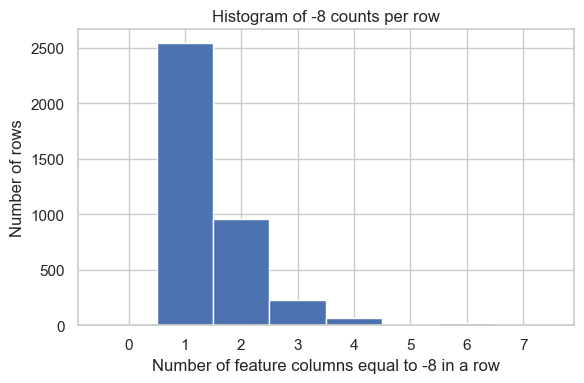

Number of -8 values per column:
NetFractionInstallBurden              3086
NumInstallTradesWBalance               786
NumBank2NatlTradesWHighUtilization     530
MSinceMostRecentInqexcl7days           436
MSinceOldestTradeOpen                  219
NetFractionRevolvingBurden             173
MSinceMostRecentDelq                   157
NumRevolvingTradesWBalance             146
PercentTradesWBalance                   17
NumTrades90Ever2DerogPubRec              0
NumTrades60Ever2DerogPubRec              0
MSinceMostRecentTradeOpen                0
ExternalRiskEstimate                     0
NumSatisfactoryTrades                    0
AverageMInFile                           0
PercentInstallTrades                     0
NumTradesOpeninLast12M                   0
NumTotalTrades                           0
MaxDelqEver                              0
PercentTradesNeverDelq                   0
MaxDelq2PublicRecLast12M                 0
NumInqLast6M                             0
NumInqLast6Mexcl7days 

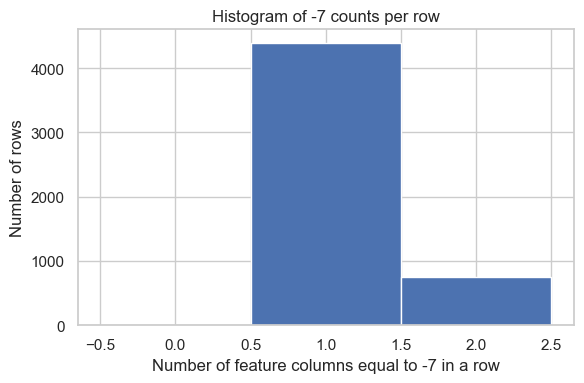

Number of -7 values per column:
MSinceMostRecentDelq                  4199
MSinceMostRecentInqexcl7days          1685
ExternalRiskEstimate                     0
AverageMInFile                           0
NumSatisfactoryTrades                    0
MSinceOldestTradeOpen                    0
MSinceMostRecentTradeOpen                0
NumTrades90Ever2DerogPubRec              0
NumTrades60Ever2DerogPubRec              0
MaxDelq2PublicRecLast12M                 0
PercentTradesNeverDelq                   0
MaxDelqEver                              0
NumTotalTrades                           0
NumTradesOpeninLast12M                   0
PercentInstallTrades                     0
NumInqLast6M                             0
NumInqLast6Mexcl7days                    0
NetFractionRevolvingBurden               0
NetFractionInstallBurden                 0
NumRevolvingTradesWBalance               0
NumInstallTradesWBalance                 0
NumBank2NatlTradesWHighUtilization       0
PercentTradesWBalance 

In [30]:
# Select feature columns (everything except the label)
exclude_cols = ["Risk_Performance"]
feature_cols = [c for c in df.columns if c not in exclude_cols]

# Make sure feature columns are floats
df[feature_cols] = df[feature_cols].astype("float32")

# ====== -9 ANALYSIS ======

# Rows where EVERY feature column is -9
rows_all_minus9 = (df[feature_cols] == -9).all(axis=1)
n_rows_all_minus9 = rows_all_minus9.sum()
print("Number of rows where every feature column is -9:", n_rows_all_minus9)

rows_only_minus9 = df[rows_all_minus9]
print("Rows where every feature column is -9:")
# print(rows_only_minus9)

# Rows where AT LEAST ONE feature column is -9
rows_with_minus9_any = (df[feature_cols] == -9).any(axis=1)
n_rows_with_minus9_any = rows_with_minus9_any.sum()
print("Number of rows where at least one feature column is -9:", n_rows_with_minus9_any)

rows_with_minus9_any_df = df[rows_with_minus9_any]

# Rows where SOME BUT NOT ALL feature columns are -9
rows_some_not_all_minus9 = rows_with_minus9_any & (~rows_all_minus9)
n_rows_some_not_all_minus9 = rows_some_not_all_minus9.sum()
print("Number of rows where some but not all feature columns are -9:", n_rows_some_not_all_minus9)

rows_some_not_all_minus9_df = df[rows_some_not_all_minus9]
print("Rows where some but not all feature columns are -9:")
# print(rows_some_not_all_minus9_df)

# ====== LOOP FOR -8 AND -7 ======

for value in [-8, -7]:
    print("\n=== Analysis for value", value, "===")

    # Rows where AT LEAST ONE feature column is this value
    rows_with_value_any = (df[feature_cols] == value).any(axis=1)
    n_rows_with_value_any = rows_with_value_any.sum()
    print(f"Number of rows where at least one feature column is {value}:", n_rows_with_value_any)

    rows_with_value_any_df = df[rows_with_value_any]

    # For each row, count how many feature columns are exactly this value
    counts_per_row = (df[feature_cols] == value).sum(axis=1)

    # Count how many rows have 0, 1, 2, ... columns equal to this value
    count_per_num_cols = counts_per_row.value_counts().sort_index()
    print(f"Number of rows for each value of 'number of columns that are {value}':")
    print(count_per_num_cols)

    # Keep only rows that have at least one occurrence of this value
    counts_per_row_nonzero = counts_per_row[counts_per_row > 0]

    # Plot histogram of these counts
    plt.figure(figsize=(6, 4))
    plt.hist(
        counts_per_row_nonzero,
        bins=range(int(counts_per_row_nonzero.max()) + 2),
        align="left"
    )
    plt.xlabel(f"Number of feature columns equal to {value} in a row")
    plt.ylabel("Number of rows")
    plt.title(f"Histogram of {value} counts per row")
    plt.tight_layout()
    plt.show()

    counts_per_column = (df[feature_cols] == value).sum(axis=0).sort_values(ascending=False)
    print(f"Number of {value} values per column:")
    print(counts_per_column)

In [31]:
# Select interesting feature columns
include_cols = ["NetFractionInstallBurden", "NumRevolvingTradesWBalance", "NumInstallTradesBalance", "PercentTradesBalance"]
feature_cols = [c for c in df.columns if c in include_cols]

# Make sure feature columns are floats
df[feature_cols] = df[feature_cols].astype("float32")
df[feature_cols].head(25)

,NetFractionInstallBurden,NumRevolvingTradesWBalance
0,60.0,7.0
1,93.0,4.0
2,84.0,5.0
3,-9.0,-9.0
4,77.0,5.0
5,75.0,2.0
6,-8.0,4.0
7,15.0,5.0
8,-8.0,-8.0
9,-8.0,3.0


In [32]:
df = df[~(df[feature_cols] == -9).all(axis=1)]
df[feature_cols]  = df[feature_cols].replace(-9, np.nan)

Rows where every feature column is -9:
Number of rows where some but not all feature columns are -9: 0
Rows where some but not all feature columns are -9:
Empty DataFrame
Columns: [ExternalRiskEstimate, MSinceOldestTradeOpen, MSinceMostRecentTradeOpen, AverageMInFile, NumSatisfactoryTrades, NumTrades60Ever2DerogPubRec, NumTrades90Ever2DerogPubRec, PercentTradesNeverDelq, MSinceMostRecentDelq, MaxDelq2PublicRecLast12M, MaxDelqEver, NumTotalTrades, NumTradesOpeninLast12M, PercentInstallTrades, MSinceMostRecentInqexcl7days, NumInqLast6M, NumInqLast6Mexcl7days, NetFractionRevolvingBurden, NetFractionInstallBurden, NumRevolvingTradesWBalance, NumInstallTradesWBalance, NumBank2NatlTradesWHighUtilization, PercentTradesWBalance, Risk_Performance]
Index: []

=== Analysis for value -8 ===
Number of rows where at least one feature column is -8: 3817
Number of rows for each value of 'number of columns that are -8':
0    5059
1    2539
2     960
3     226
4      66
5       8
6      17
7       1
Nam

C:\Users\marco\AppData\Local\Temp\ipykernel_21964\2755882674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature_cols] = df[feature_cols].astype("float32")


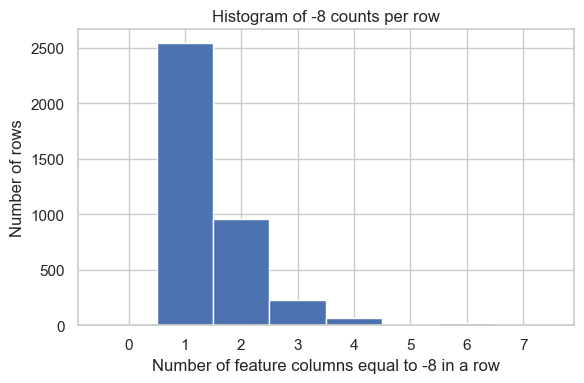

Number of -8 values per column:
NetFractionInstallBurden              3086
NumInstallTradesWBalance               786
NumBank2NatlTradesWHighUtilization     530
MSinceMostRecentInqexcl7days           436
MSinceOldestTradeOpen                  219
NetFractionRevolvingBurden             173
MSinceMostRecentDelq                   157
NumRevolvingTradesWBalance             146
PercentTradesWBalance                   17
NumTrades90Ever2DerogPubRec              0
NumTrades60Ever2DerogPubRec              0
MSinceMostRecentTradeOpen                0
ExternalRiskEstimate                     0
NumSatisfactoryTrades                    0
AverageMInFile                           0
PercentInstallTrades                     0
NumTradesOpeninLast12M                   0
NumTotalTrades                           0
MaxDelqEver                              0
PercentTradesNeverDelq                   0
MaxDelq2PublicRecLast12M                 0
NumInqLast6M                             0
NumInqLast6Mexcl7days 

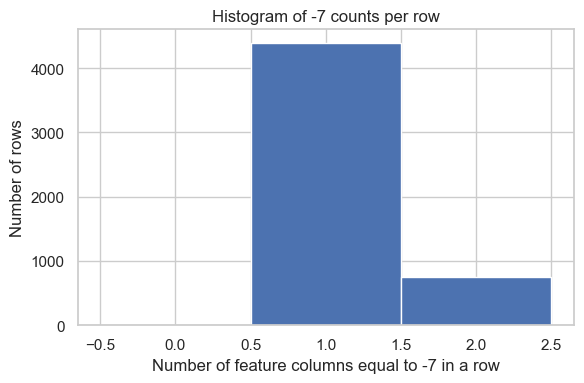

Number of -7 values per column:
MSinceMostRecentDelq                  4199
MSinceMostRecentInqexcl7days          1685
ExternalRiskEstimate                     0
AverageMInFile                           0
NumSatisfactoryTrades                    0
MSinceOldestTradeOpen                    0
MSinceMostRecentTradeOpen                0
NumTrades90Ever2DerogPubRec              0
NumTrades60Ever2DerogPubRec              0
MaxDelq2PublicRecLast12M                 0
PercentTradesNeverDelq                   0
MaxDelqEver                              0
NumTotalTrades                           0
NumTradesOpeninLast12M                   0
PercentInstallTrades                     0
NumInqLast6M                             0
NumInqLast6Mexcl7days                    0
NetFractionRevolvingBurden               0
NetFractionInstallBurden                 0
NumRevolvingTradesWBalance               0
NumInstallTradesWBalance                 0
NumBank2NatlTradesWHighUtilization       0
PercentTradesWBalance 

In [10]:
# Select feature columns (everything except the label)
exclude_cols = ["Risk_Performance"]
feature_cols = [c for c in df.columns if c not in exclude_cols]

# Make sure feature columns are floats
df[feature_cols] = df[feature_cols].astype("float32")

# ====== -9 ANALYSIS ======

# Rows where EVERY feature column is -9
rows_all_minus9 = (df[feature_cols] == -9).all(axis=1)
n_rows_all_minus9 = rows_all_minus9.sum()
#print("Number of rows where every feature column is -9:", n_rows_all_minus9)

rows_only_minus9 = df[rows_all_minus9]
print("Rows where every feature column is -9:")
#print(rows_only_minus9)

# Rows where AT LEAST ONE feature column is -9
rows_with_minus9_any = (df[feature_cols] == -9).any(axis=1)
n_rows_with_minus9_any = rows_with_minus9_any.sum()
#print("Number of rows where at least one feature column is -9:", n_rows_with_minus9_any)

rows_with_minus9_any_df = df[rows_with_minus9_any]

# Rows where SOME BUT NOT ALL feature columns are -9
rows_some_not_all_minus9 = rows_with_minus9_any & (~rows_all_minus9)
rows_some_not_all_minus9 = rows_some_not_all_minus9.replace(-9, np.nan)

n_rows_some_not_all_minus9 = rows_some_not_all_minus9.sum()
print("Number of rows where some but not all feature columns are -9:", n_rows_some_not_all_minus9)

rows_some_not_all_minus9_df = df[rows_some_not_all_minus9]
print("Rows where some but not all feature columns are -9:")
print(rows_some_not_all_minus9_df)

# ====== LOOP FOR -8 AND -7 ======

for value in [-8, -7]:
    print("\n=== Analysis for value", value, "===")

    # Rows where AT LEAST ONE feature column is this value
    rows_with_value_any = (df[feature_cols] == value).any(axis=1)
    n_rows_with_value_any = rows_with_value_any.sum()
    print(f"Number of rows where at least one feature column is {value}:", n_rows_with_value_any)

    rows_with_value_any_df = df[rows_with_value_any]

    # For each row, count how many feature columns are exactly this value
    counts_per_row = (df[feature_cols] == value).sum(axis=1)

    # Count how many rows have 0, 1, 2, ... columns equal to this value
    count_per_num_cols = counts_per_row.value_counts().sort_index()
    print(f"Number of rows for each value of 'number of columns that are {value}':")
    print(count_per_num_cols)

    # Keep only rows that have at least one occurrence of this value
    counts_per_row_nonzero = counts_per_row[counts_per_row > 0]

    # Plot histogram of these counts
    plt.figure(figsize=(6, 4))
    plt.hist(
        counts_per_row_nonzero,
        bins=range(int(counts_per_row_nonzero.max()) + 2),
        align="left"
    )
    plt.xlabel(f"Number of feature columns equal to {value} in a row")
    plt.ylabel("Number of rows")
    plt.title(f"Histogram of {value} counts per row")
    plt.tight_layout()
    plt.show()

    counts_per_column = (df[feature_cols] == value).sum(axis=0).sort_values(ascending=False)
    print(f"Number of {value} values per column:")
    print(counts_per_column)


In [33]:
# Missing values, duplicates, basic stats
# Replace -7 with 0 to indicate that the people are 'Good' people
# Replace -8 with NaN
# Remove all rows with all -9 values and replace the remaining -9-values with NaN

print("Missing values per column:")
display(df.isna().sum().sort_values(ascending=False))
print("\nMissing % per column (top 20):")
display((df.isna().mean() * 100).sort_values(ascending=False).head(20))

# Duplicates
# Count duplicates in the full dataframe
n_dup = df.duplicated().sum()
print(f"\nDuplicated rows in full data: {n_dup}")

print("\nDescriptive statistics (after removing duplicates):")
display(df.describe().T)


Missing values per column:


ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
Risk_Performance                      0
dtype: int64


Missing % per column (top 20):


ExternalRiskEstimate            0.0
MSinceOldestTradeOpen           0.0
MSinceMostRecentTradeOpen       0.0
AverageMInFile                  0.0
NumSatisfactoryTrades           0.0
NumTrades60Ever2DerogPubRec     0.0
NumTrades90Ever2DerogPubRec     0.0
PercentTradesNeverDelq          0.0
MSinceMostRecentDelq            0.0
MaxDelq2PublicRecLast12M        0.0
MaxDelqEver                     0.0
NumTotalTrades                  0.0
NumTradesOpeninLast12M          0.0
PercentInstallTrades            0.0
MSinceMostRecentInqexcl7days    0.0
NumInqLast6M                    0.0
NumInqLast6Mexcl7days           0.0
NetFractionRevolvingBurden      0.0
NetFractionInstallBurden        0.0
NumRevolvingTradesWBalance      0.0
dtype: float64


Duplicated rows in full data: 0

Descriptive statistics (after removing duplicates):


,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,8876.0,71.982201,10.228601,-9.0,65.0,72.0,80.0,94.0
MSinceOldestTradeOpen,8876.0,195.816132,102.656380,-8.0,131.0,183.0,256.0,803.0
MSinceMostRecentTradeOpen,8876.0,9.576724,12.998743,0.0,3.0,6.0,12.0,383.0
AverageMInFile,8876.0,78.883278,34.227055,4.0,57.0,76.0,97.0,383.0
NumSatisfactoryTrades,8876.0,21.067711,11.359136,0.0,13.0,20.0,28.0,79.0
NumTrades60Ever2DerogPubRec,8876.0,0.587990,1.247976,0.0,0.0,0.0,1.0,19.0
NumTrades90Ever2DerogPubRec,8876.0,0.391280,1.008185,0.0,0.0,0.0,0.0,19.0
PercentTradesNeverDelq,8876.0,92.362099,11.779196,0.0,89.0,97.0,100.0,100.0
MSinceMostRecentDelq,8876.0,7.752479,20.776211,-8.0,-7.0,0.0,15.0,83.0
MaxDelq2PublicRecLast12M,8876.0,5.761717,1.640683,0.0,5.0,6.0,7.0,9.0


### STEP 3 TARGET / LABEL ANALYSIS


In [34]:
import time

start = time.time()
print(df["Risk_Performance"].value_counts())
end = time.time()

print("\nTime:", end - start)


Risk_Performance
0.0    4629
1.0    4247
Name: count, dtype: int64

Time: 0.0015544891357421875


In [36]:
df.shape

(8876, 24)

### STEP 4 UNIVARIATE FEATURE ANALYSIS

Plot sample shape: (8876, 24)


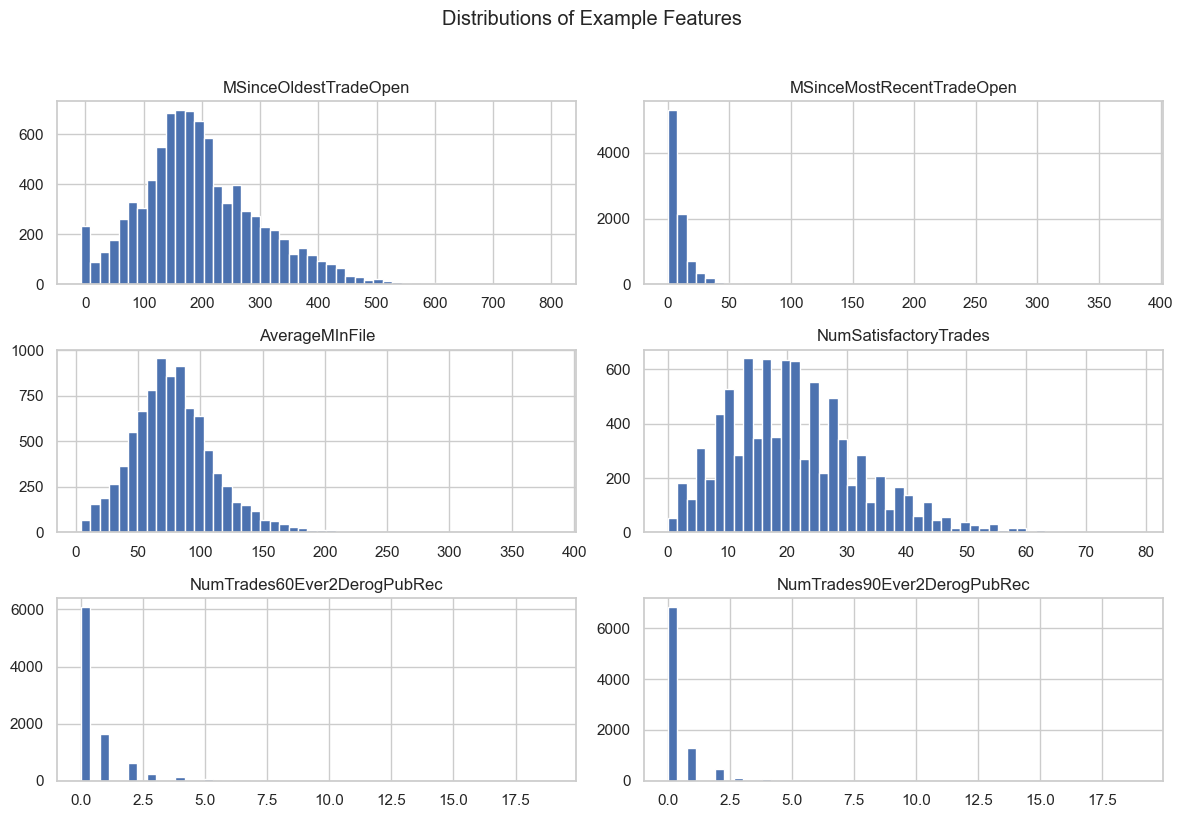

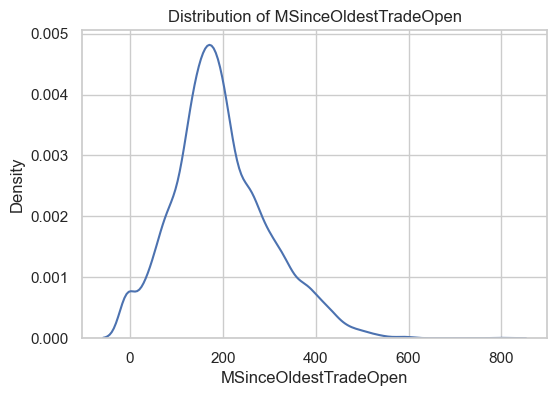

Feature stats


,mean,std,min,max,skew,kurtosis
ExternalRiskEstimate,71.982201,10.228601,-9.0,94.0,-0.536516,3.378599
MSinceOldestTradeOpen,195.816132,102.656380,-8.0,803.0,0.555622,0.520234
MSinceMostRecentTradeOpen,9.576724,12.998743,0.0,383.0,7.385660,120.040497
AverageMInFile,78.883278,34.227055,4.0,383.0,0.916861,2.696731
NumSatisfactoryTrades,21.067711,11.359136,0.0,79.0,0.807566,0.878387
NumTrades60Ever2DerogPubRec,0.587990,1.247976,0.0,19.0,4.181995,28.931749
NumTrades90Ever2DerogPubRec,0.391280,1.008185,0.0,19.0,5.483291,51.787670
PercentTradesNeverDelq,92.362099,11.779196,0.0,100.0,-2.432829,7.962326
MSinceMostRecentDelq,7.752479,20.776211,-8.0,83.0,1.580394,1.780375
MaxDelq2PublicRecLast12M,5.761717,1.640683,0.0,9.0,-1.789774,3.248102


In [37]:
plot_df = df.sample(min(SAMPLE_FOR_PLOTS, len(df)), random_state=42)
print("Plot sample shape:", plot_df.shape)

# histogram
example_features = plot_df.columns[1:7]  # skip label and take 6 features
plot_df[example_features].hist(figsize=(12, 8), bins=50)
plt.suptitle("Distributions of Example Features", y=1.02)
plt.tight_layout()
plt.show()

# KDE for one feature
feat = plot_df.columns[1]
plt.figure(figsize=(6,4))
sns.kdeplot(data=plot_df, x=feat)
plt.title(f"Distribution of {feat}")
plt.show()

# Distribution stats
stats = pd.DataFrame({
    "mean": df.mean(numeric_only=True),
    "std": df.std(numeric_only=True),
    "min": df.min(numeric_only=True),
    "max": df.max(numeric_only=True),
    "skew": df.skew(numeric_only=True),
    "kurtosis": df.kurtosis(numeric_only=True)
})
print("Feature stats")
display(stats)


### STEP 5 BIVARIATE: FEATURES vs LABEL

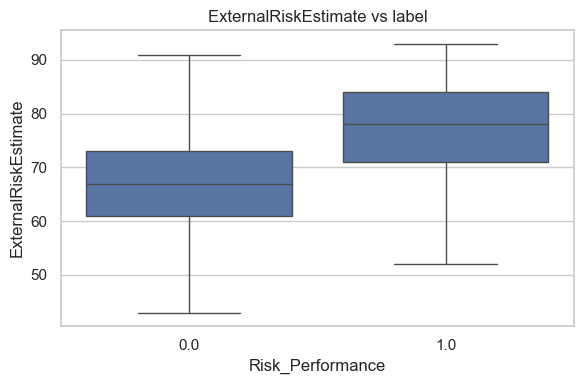

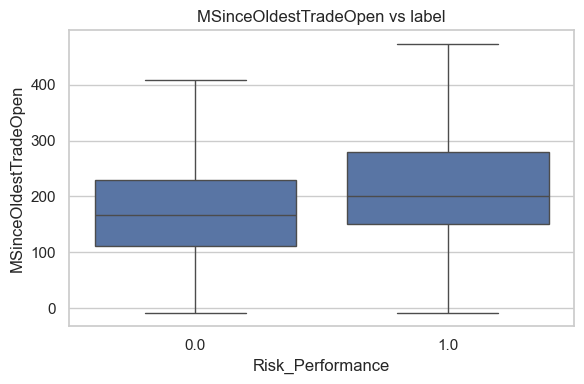

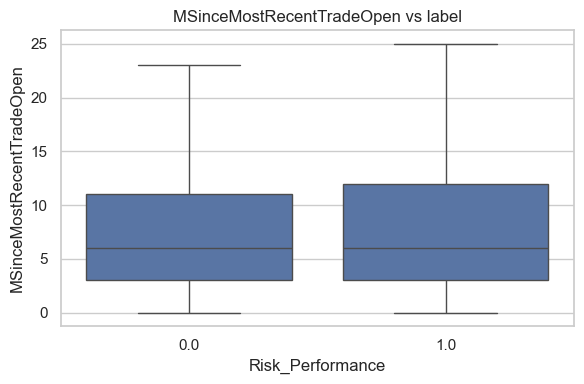

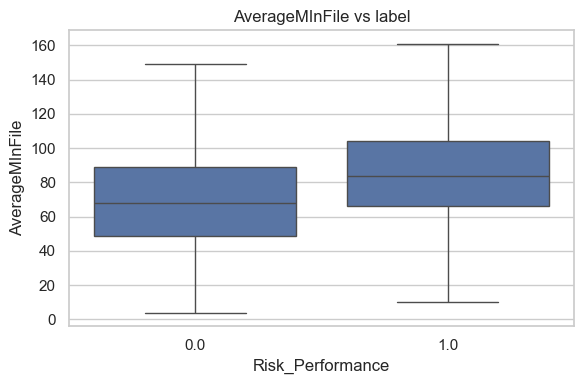

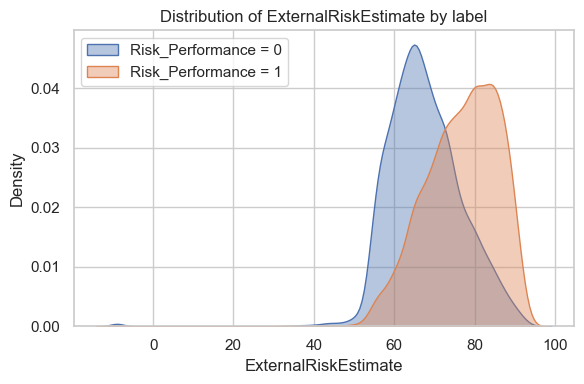

In [38]:
# choose tbe numerical values you dont want
exclude_cols = ["Risk_Performance"]

numeric_cols = [
    c for c in df.columns
    if c not in exclude_cols and np.issubdtype(df[c].dtype, np.number)
]

features_for_box = numeric_cols[:4]           # first 4 features
plot_cols = ["Risk_Performance"] + features_for_box

plot_df = df[plot_cols].sample(
    min(SAMPLE_FOR_PLOTS, len(df)), random_state=42
).copy()

# Boxplots
for col in features_for_box:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Risk_Performance", y=col, data=plot_df, showfliers=False)
    plt.title(f"{col} vs label")
    plt.tight_layout()
    plt.show()

# density plot
feat = features_for_box[0]

plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=plot_df[plot_df["Risk_Performance"] == 0],
    x=feat, label="Risk_Performance = 0", fill=True, alpha=0.4,
)
sns.kdeplot(
    data=plot_df[plot_df["Risk_Performance"] == 1],
    x=feat, label="Risk_Performance = 1", fill=True, alpha=0.4,
)
plt.title(f"Distribution of {feat} by label")
plt.legend()
plt.tight_layout()
plt.show()


### STEP 6 CORRELATION & TOP FEATURES

Top correlations


ExternalRiskEstimate            0.445241
NetFractionRevolvingBurden     -0.327931
PercentTradesWBalance          -0.267581
PercentTradesNeverDelq          0.255646
AverageMInFile                  0.242093
MaxDelq2PublicRecLast12M        0.235621
MaxDelqEver                     0.215682
MSinceOldestTradeOpen           0.198461
NumTrades60Ever2DerogPubRec    -0.167393
NumInqLast6M                   -0.143252
NumSatisfactoryTrades           0.143111
PercentInstallTrades           -0.138207
NumTrades90Ever2DerogPubRec    -0.137987
NumInqLast6Mexcl7days          -0.137527
MSinceMostRecentInqexcl7days    0.112372
Name: Risk_Performance, dtype: float64

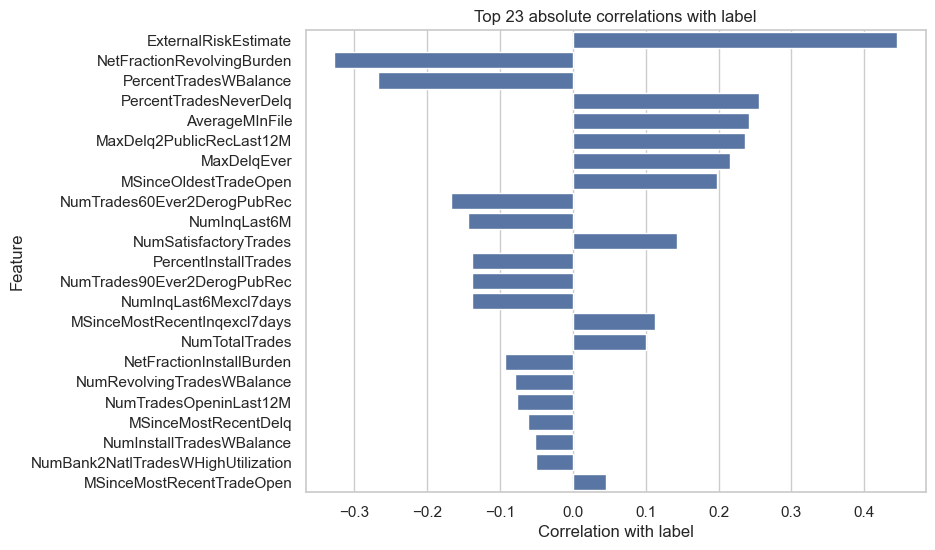

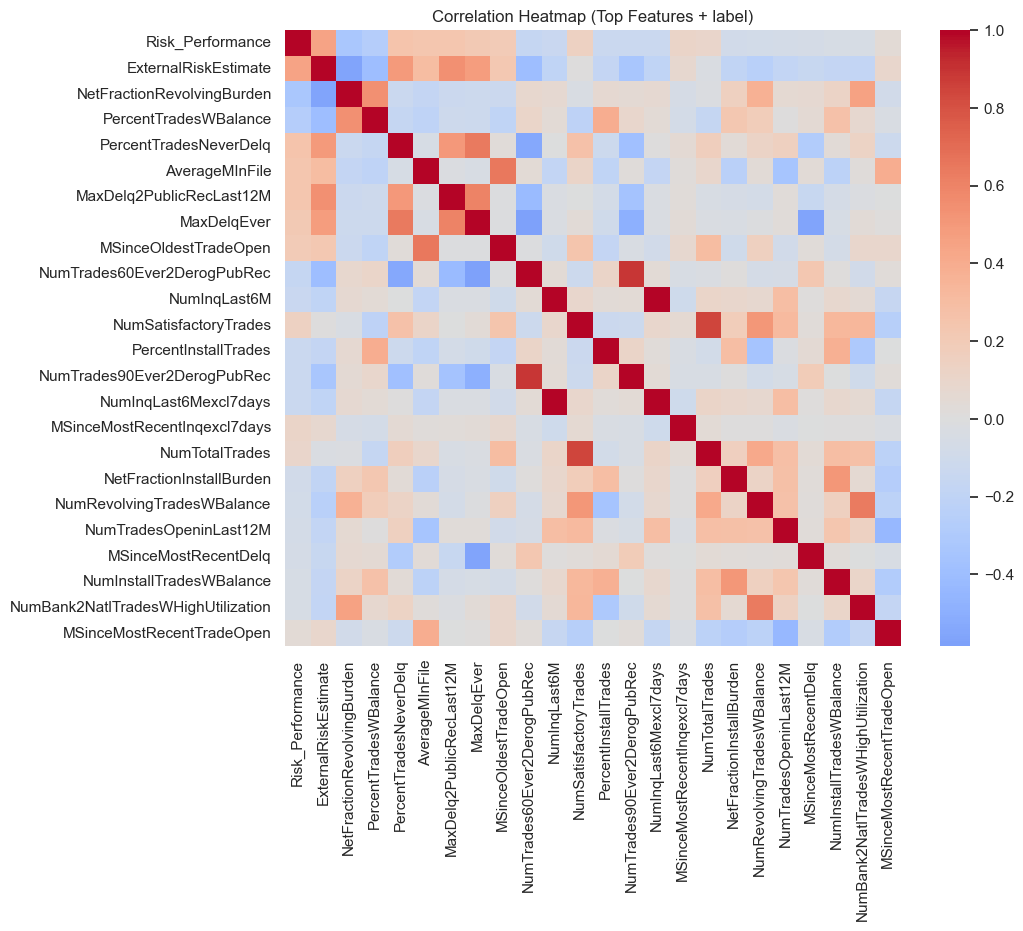

In [40]:
# corr matrix
corr = df.corr(numeric_only=True)

# correlation matrix
corr_with_label = corr["Risk_Performance"].drop("Risk_Performance").sort_values(
    key=np.abs, ascending=False
)

print("Top correlations")
display(corr_with_label.head(15))

# Barplot
top_n = 23
top_corr = corr_with_label.head(top_n)

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title(f"Top {top_n} absolute correlations with label")
plt.xlabel("Correlation with label")
plt.ylabel("Feature")
plt.show()

# Correlation heatmap
top_features = ["Risk_Performance"] + list(top_corr.index)
corr_top = corr.loc[top_features, top_features]

plt.figure(figsize=(10,8))
sns.heatmap(corr_top, annot=False, cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap (Top Features + label)")
plt.show()


### STEP 7 MULTIVARIATE VIEW (PCA 2D)

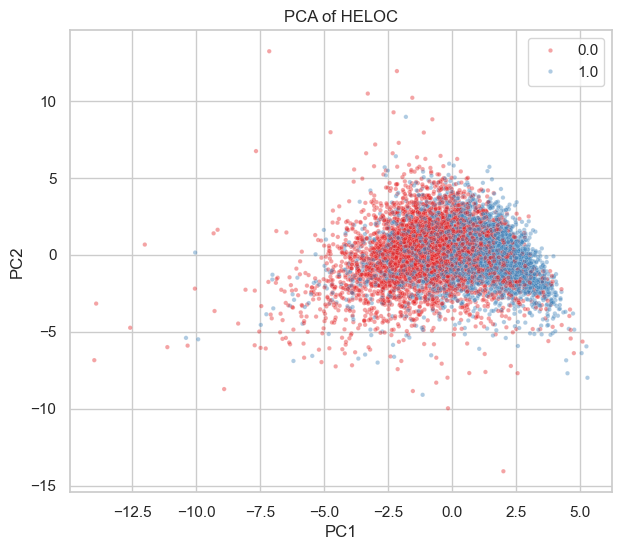

Explained variance ratio [0.17771211 0.15668702]


In [41]:
feature_cols = [c for c in df.columns if c != "Risk_Performance"]

pca_sample = df.sample(min(SAMPLE_FOR_PLOTS, len(df)), random_state=42)
X = pca_sample[feature_cols].values
y = pca_sample["Risk_Performance"].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Risk_Performance": y
})

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Risk_Performance",
    alpha=0.4,
    s=10,
    palette="Set1"
)
plt.title("PCA of HELOC")
plt.legend()
plt.show()

print("Explained variance ratio", pca.explained_variance_ratio_)


### STEP 8 FEATURE ENGINEERING CHECKS

In [42]:
unique_ratio = df.nunique() / len(df)
print("Unique ratio per column (lowest 10):")
display(unique_ratio.sort_values().head(10))

print("""
Feature engineering ideas:
- Drop features with extremely low variance (near-constant).
- Use StandardScaler for models like logistic regression / NN.
- Consider tree-based models (XGBoost, RandomForest) for non-linearities.
- If class imbalance is strong: use class weights or resampling.
- For huge size: start modeling on a subsample, then scale up.
""")


Unique ratio per column (lowest 10):


Risk_Performance                      0.000225
MaxDelqEver                           0.000789
MaxDelq2PublicRecLast12M              0.001014
NumTrades90Ever2DerogPubRec           0.001803
NumTradesOpeninLast12M                0.002028
NumTrades60Ever2DerogPubRec           0.002028
NumBank2NatlTradesWHighUtilization    0.002028
NumInstallTradesWBalance              0.002141
NumInqLast6Mexcl7days                 0.002929
NumInqLast6M                          0.002929
dtype: float64


Feature engineering ideas:
- Drop features with extremely low variance (near-constant).
- Use StandardScaler for models like logistic regression / NN.
- Consider tree-based models (XGBoost, RandomForest) for non-linearities.
- If class imbalance is strong: use class weights or resampling.
- For huge size: start modeling on a subsample, then scale up.

